In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467


In [3]:
del df["Lat"]
del df["Long"]

In [4]:
countries_df = df[["Province/State","Country/Region"]]
countries_df.head()

,Province/State,Country/Region
0,NaN,Afghanistan
1,NaN,Albania
2,NaN,Algeria
3,NaN,Andorra
4,NaN,Angola


In [5]:
days_df = df.copy()
del days_df["Province/State"]
del days_df["Country/Region"]

In [6]:
days_df = days_df.stack().reset_index()
days_df.columns=["country_id", "date", "count"]
days_df.head()

,country_id,date,count
0,0,1/22/20,0
1,0,1/23/20,0
2,0,1/24/20,0
3,0,1/25/20,0
4,0,1/26/20,0


In [7]:
df = pd.merge(countries_df, days_df, left_index=True, right_on="country_id")
del df["country_id"]
df["date"] = pd.to_datetime(df["date"])
df.head()

,Province/State,Country/Region,date,count
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Afghanistan,2020-01-23,0
2,NaN,Afghanistan,2020-01-24,0
3,NaN,Afghanistan,2020-01-25,0
4,NaN,Afghanistan,2020-01-26,0


In [8]:
global_df = df.groupby(["date"],as_index=False).sum("count")

In [9]:
global_df.tail()

,date,count
509,2021-06-14,176272506
510,2021-06-15,176643836
511,2021-06-16,177040185
512,2021-06-17,177434597
513,2021-06-18,177764675


In [10]:
latest_date_str = global_df.date.max().strftime("%Y-%m-%d")

In [11]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [12]:
df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [13]:
#plt.figure(figsize=(9.5,5))
#plt.bar(global_df["date"],global_df["count"]/1000,label="positive")
#plt.legend()

In [14]:
trans = pd.DataFrame()
trans["date"] = global_df.iloc[1:]["date"]
trans["count1"] = global_df["count"].iloc[1:]
trans = trans.reset_index().drop(columns="index")
trans["count"] = trans["count1"] - global_df["count"].iloc[0:]
del trans["count1"]
trans["move_ave7"] = trans["count"].rolling(7).mean()


In [15]:
trans.tail()

,date,count,move_ave7
508,2021-06-14,308519.0,377201.428571
509,2021-06-15,371330.0,377846.000000
510,2021-06-16,396349.0,374540.000000
511,2021-06-17,394412.0,366669.714286
512,2021-06-18,330078.0,353643.857143


<IPython.core.display.Javascript object>


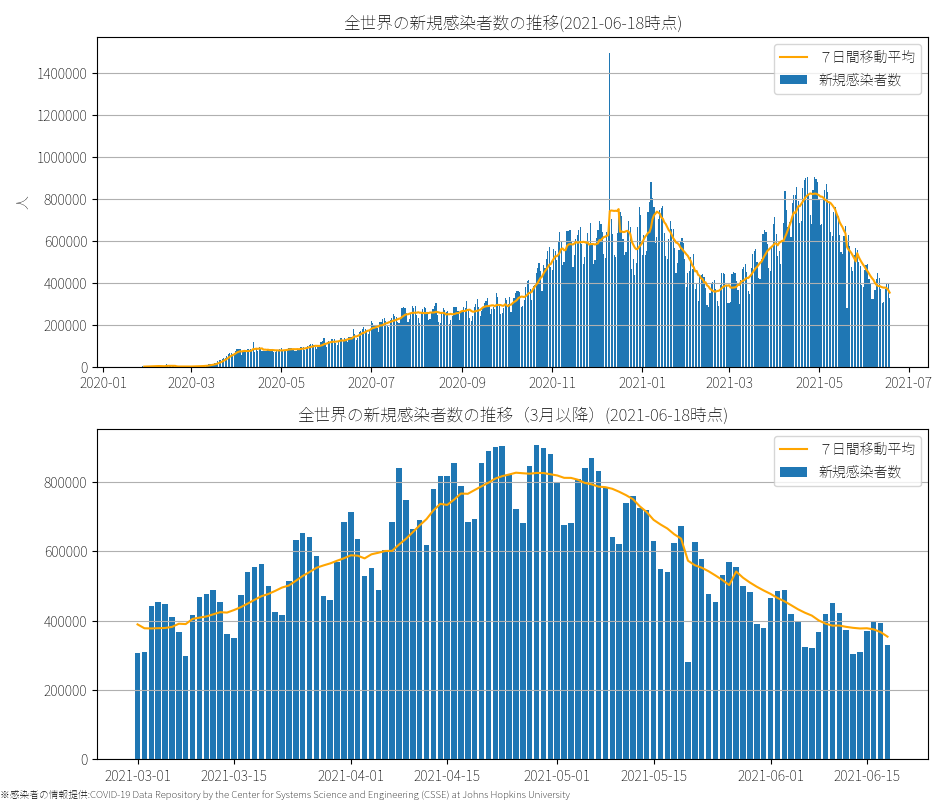

In [16]:
fig=plt.figure(figsize=(9.5,8))
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.bar(trans["date"],trans["count"],label="新規感染者数")
plt.plot_date(trans["date"],trans["move_ave7"],label="７日間移動平均", fmt="-", color="orange")
plt.title("全世界の新規感染者数の推移({}時点)".format(latest_date_str))
plt.ylabel("人")
plt.grid(axis="y")
plt.legend()

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.title("全世界の新規感染者数の推移（3月以降）({}時点)".format(latest_date_str))
chart_data = trans[trans.date >= "2021-03-01"]
plt.bar(chart_data["date"],chart_data["count"],label="新規感染者数")
plt.plot_date(chart_data["date"],chart_data["move_ave7"],label="７日間移動平均", fmt="-", color="orange")
plt.grid(axis="y")
plt.legend()
#plt.legend(bbox_to_anchor=(0, 1),loc='upper left', fontsize=9)
fig.text(0,0
         ,"※感染者の情報提供:COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University",
        fontsize=7,ha="left",va="bottom")

fig.tight_layout()

In [17]:
fig.savefig("out/covid-global-transition.png")

## 国別

In [18]:
df.tail()

,Province/State,Country/Region,date,count
142887,NaN,Zimbabwe,2021-06-14,40077
142888,NaN,Zimbabwe,2021-06-15,40318
142889,NaN,Zimbabwe,2021-06-16,40556
142890,NaN,Zimbabwe,2021-06-17,40927
142891,NaN,Zimbabwe,2021-06-18,41335


### 中国の合計行を追加する

In [19]:
china_sum = df[df["Country/Region"]=="China"].groupby("date", as_index=False).sum("count")
china_sum

,date,count
0,2020-01-22,548
1,2020-01-23,643
2,2020-01-24,920
3,2020-01-25,1406
4,2020-01-26,2075
...,...,...
509,2021-06-14,103401
510,2021-06-15,103424
511,2021-06-16,103444
512,2021-06-17,103467


In [20]:
import numpy as np
china_sum.insert(0,"Country/Region","China")
china_sum.insert(0,"Province/State",np.nan)
china_sum

,Province/State,Country/Region,date,count
0,NaN,China,2020-01-22,548
1,NaN,China,2020-01-23,643
2,NaN,China,2020-01-24,920
3,NaN,China,2020-01-25,1406
4,NaN,China,2020-01-26,2075
...,...,...,...,...
509,NaN,China,2021-06-14,103401
510,NaN,China,2021-06-15,103424
511,NaN,China,2021-06-16,103444
512,NaN,China,2021-06-17,103467


In [21]:
df = pd.concat([df,china_sum])

### 国別新規陽性者数

In [22]:
trans = df.copy()
trans["inc_count"] = trans["count"].diff()
# 最小の日付は一律ゼロにする
trans.loc[trans["date"]==trans["date"].min(),"inc_count"] = 0

In [23]:
## 異常値？の訂正
import numpy as np
trans.loc[(trans["Country/Region"]=="France") & (trans.inc_count < -300000),"inc_count"]=np.nan

#### 移動平均

In [24]:
# "Province/State"と"Country/Region"の結合列を作ってユニークにする
trans["country_key"]=trans["Province/State"].fillna("NA")+"-"+trans["Country/Region"]
if trans["country_key"].isna().any():
    raise Exception("include NaN")
for k in trans.country_key.unique():
    print(k,end=",")
    trans.loc[trans.country_key==k,"cnt_move_ave7"] = trans.loc[trans.country_key==k,"count"].rolling(7).mean()
    trans.loc[trans.country_key==k,"inc_move_ave7"] = trans.loc[trans.country_key==k,"inc_count"].rolling(7).mean()

pd.concat([trans[trans.country_key=="NA-Afghanistan"].tail(3),trans[trans.country_key=="NA-Albania"].head(3)])

NA-Afghanistan,NA-Albania,NA-Algeria,NA-Andorra,NA-Angola,NA-Antigua and Barbuda,NA-Argentina,NA-Armenia,Australian Capital Territory-Australia,New South Wales-Australia,Northern Territory-Australia,Queensland-Australia,South Australia-Australia,Tasmania-Australia,Victoria-Australia,Western Australia-Australia,NA-Austria,NA-Azerbaijan,NA-Bahamas,NA-Bahrain,NA-Bangladesh,NA-Barbados,NA-Belarus,NA-Belgium,NA-Belize,NA-Benin,NA-Bhutan,NA-Bolivia,NA-Bosnia and Herzegovina,NA-Botswana,NA-Brazil,NA-Brunei,NA-Bulgaria,NA-Burkina Faso,NA-Burma,NA-Burundi,NA-Cabo Verde,NA-Cambodia,NA-Cameroon,Alberta-Canada,British Columbia-Canada,Diamond Princess-Canada,Grand Princess-Canada,Manitoba-Canada,New Brunswick-Canada,Newfoundland and Labrador-Canada,Northwest Territories-Canada,Nova Scotia-Canada,Nunavut-Canada,Ontario-Canada,Prince Edward Island-Canada,Quebec-Canada,Repatriated Travellers-Canada,Saskatchewan-Canada,Yukon-Canada,NA-Central African Republic,NA-Chad,NA-Chile,Anhui-China,Beijing-China,

,Province/State,Country/Region,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7
511,NaN,Afghanistan,2021-06-16,93288,16.0,NA-Afghanistan,90032.428571,1319.714286
512,NaN,Afghanistan,2021-06-17,96531,3243.0,NA-Afghanistan,91552.285714,1519.857143
513,NaN,Afghanistan,2021-06-18,98734,2203.0,NA-Afghanistan,93126.285714,1574.000000
514,NaN,Albania,2020-01-22,0,0.0,NA-Albania,NaN,NaN
515,NaN,Albania,2020-01-23,0,0.0,NA-Albania,NaN,NaN
516,NaN,Albania,2020-01-24,0,0.0,NA-Albania,NaN,NaN


In [25]:
trans["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

## 人口当たり

In [26]:
pop = pd.read_excel("world-data/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx",header=16)
pop_latest = pop.loc[pop["Type"]=="Country/Area"][[pop.columns[2],pop.columns[-1]]]
pop_latest.columns = ["un_country","population"]
pop_latest.head(1)

,un_country,population
26,Burundi,11890.781


### 名称変換

In [27]:
alternates = pd.DataFrame([
    ("US","United States of America"),
    ("Russia","Russian Federation"),
    ("Iran","Iran (Islamic Republic of)"),
    ("Bolivia","Bolivia (Plurinational State of)"),
    ("Moldova","Republic of Moldova"),
    ("Venezuela","Venezuela (Bolivarian Republic of)"),
    ("Korea, South","Republic of Korea"),
    ("Congo (Kinshasa)","Democratic Republic of the Congo"),
    ("Congo (Brazzaville)","Congo"),
    ("Vietnam","Viet Nam"),
    ("Laos","Lao People's Democratic Republic"),
    ("Taiwan*","China, Taiwan Province of China"),
    ("Tanzania","United Republic of Tanzania"),
    ("Brunei","Brunei Darussalam"),
    ("Micronesia","Micronesia (Fed. States of)"),
    ("Syria","Syrian Arab Republic"),
], columns = ["covid_country","un_country"])

In [28]:
alternates.head(2)

,covid_country,un_country
0,US,United States of America
1,Russia,Russian Federation


In [29]:
trans_pop = pd.merge(trans, alternates, left_on="Country/Region", right_on="covid_country", how="left")
del trans_pop["covid_country"]
trans_pop.rename(columns={"Country/Region":"country"},inplace=True)

In [30]:
trans_pop.head()

,Province/State,country,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country
0,NaN,Afghanistan,2020-01-22,0,0.0,NA-Afghanistan,NaN,NaN,NaN
1,NaN,Afghanistan,2020-01-23,0,0.0,NA-Afghanistan,NaN,NaN,NaN
2,NaN,Afghanistan,2020-01-24,0,0.0,NA-Afghanistan,NaN,NaN,NaN
3,NaN,Afghanistan,2020-01-25,0,0.0,NA-Afghanistan,NaN,NaN,NaN
4,NaN,Afghanistan,2020-01-26,0,0.0,NA-Afghanistan,NaN,NaN,NaN


In [31]:
trans_pop.isnull().any(axis=0)

Province/State     True
country           False
date              False
count             False
inc_count          True
country_key       False
cnt_move_ave7      True
inc_move_ave7      True
un_country         True
dtype: bool

In [32]:
trans_pop["un_country"].fillna(trans_pop["country"],inplace=True)

In [33]:
trans_pop.isnull().any(axis=0)

Province/State     True
country           False
date              False
count             False
inc_count          True
country_key       False
cnt_move_ave7      True
inc_move_ave7      True
un_country        False
dtype: bool

In [34]:
trans_pop = pd.merge(trans_pop, pop_latest, on="un_country", how="left")

In [35]:
trans_pop.head()

,Province/State,country,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country,population
0,NaN,Afghanistan,2020-01-22,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341
1,NaN,Afghanistan,2020-01-23,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341
2,NaN,Afghanistan,2020-01-24,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341
3,NaN,Afghanistan,2020-01-25,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341
4,NaN,Afghanistan,2020-01-26,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341


In [36]:
trans_pop["count_per_mil_pop"] = trans_pop["count"] / (trans_pop["population"] / 1000)
trans_pop["inc_count_per_mil_pop"] = trans_pop["inc_count"] / (trans_pop["population"] / 1000)
trans_pop["cnt_move_ave7_milpop"] = trans_pop["cnt_move_ave7"] / (trans_pop["population"] / 1000)
trans_pop["inc_move_ave7_milpop"] = trans_pop["inc_move_ave7"] / (trans_pop["population"] / 1000)

In [37]:
pd.concat([trans_pop.head(),trans_pop.tail()])

,Province/State,country,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country,population,count_per_mil_pop,inc_count_per_mil_pop,cnt_move_ave7_milpop,inc_move_ave7_milpop
0,NaN,Afghanistan,2020-01-22,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341,0.0,0.0,NaN,NaN
1,NaN,Afghanistan,2020-01-23,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341,0.0,0.0,NaN,NaN
2,NaN,Afghanistan,2020-01-24,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341,0.0,0.0,NaN,NaN
3,NaN,Afghanistan,2020-01-25,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341,0.0,0.0,NaN,NaN
4,NaN,Afghanistan,2020-01-26,0,0.0,NA-Afghanistan,NaN,NaN,Afghanistan,38928.341,0.0,0.0,NaN,NaN
143401,NaN,China,2021-06-14,103401,21.0,NA-China,103319.857143,26.428571,China,1439323.774,71.839986,0.01459,71.78361,0.018362
143402,NaN,China,2021-06-15,103424,23.0,NA-China,103346.857143,27.000000,China,1439323.774,71.855966,0.01598,71.802369,0.018759
143403,NaN,China,2021-06-16,103444,20.0,NA-China,103373.000000,26.142857,China,1439323.774,71.869861,0.013895,71.820533,0.018163
143404,NaN,China,2021-06-17,103467,23.0,NA-China,103399.000000,26.000000,China,1439323.774,71.885841,0.01598,71.838597,0.018064
143405,NaN,China,2021-06-18,103501,34.0,NA-China,103424.857143,25.857143,China,1439323.774,71.909463,0.023622,71.856561,0.017965


In [38]:
trans_pop.loc[trans_pop["country"]=="Japan"].tail()


,Province/State,country,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country,population,count_per_mil_pop,inc_count_per_mil_pop,cnt_move_ave7_milpop,inc_move_ave7_milpop
80179,NaN,Japan,2021-06-14,776565,941.0,NA-Japan,771922.857143,1768.571429,Japan,126476.458,6139.996425,7.44012,6103.292813,13.983404
80180,NaN,Japan,2021-06-15,777979,1414.0,NA-Japan,773624.428571,1701.571429,Japan,126476.458,6151.176371,11.179946,6116.746474,13.453661
80181,NaN,Japan,2021-06-16,779696,1717.0,NA-Japan,775250.571429,1626.142857,Japan,126476.458,6164.75202,13.575649,6129.603751,12.857277
80182,NaN,Japan,2021-06-17,781241,1545.0,NA-Japan,776805.428571,1554.857143,Japan,126476.458,6176.967733,12.215712,6141.8974,12.293649
80183,NaN,Japan,2021-06-18,782877,1636.0,NA-Japan,778317.428571,1512.000000,Japan,126476.458,6189.902946,12.935214,6153.852194,11.954794


### 主要国の定義

In [89]:
"""
countries = pd.DataFrame({"country":[
    "Japan",
    "US",
    "India",
    "Sweden",
    "Brazil",
    "Israel",
    "United Kingdom",
    "France",
    "Russia",
]})
"""
countries = pd.DataFrame([
    ("Japan",""),
    ("US",""),
    ("India","20210415"),
    ("Sweden","20210511"),
    ("Brazil",""),
    ("Israel","20210315"),
    ("United Kingdom",""),
    ("France","20210425"),
    ("Russia",""),
],columns=["country","text_disp_date"])

In [62]:
#c_df = pd.merge(countries, trans_pop[trans_pop["Province/State"].isna()], left_on="country", right_on="Country/Region", how="inner")[["country","date","count","inc_count","move_ave7"]]
c_trans = pd.merge(countries, trans_pop[trans_pop["Province/State"].isna()], on="country", how="inner")


In [63]:
c_trans

,country,text_disp_date,Province/State,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country,population,count_per_mil_pop,inc_count_per_mil_pop,cnt_move_ave7_milpop,inc_move_ave7_milpop
0,Japan,,NaN,2020-01-22,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
1,Japan,,NaN,2020-01-23,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
2,Japan,,NaN,2020-01-24,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
3,Japan,,NaN,2020-01-25,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
4,Japan,,NaN,2020-01-26,4,2.0,NA-Japan,NaN,NaN,Japan,126476.458,0.031626,0.015813,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4621,Russia,,NaN,2021-06-14,5162049,13550.0,NA-Russia,5.122332e+06,12215.142857,Russian Federation,145934.46,35372.378806,92.8499,35100.222388,83.702937
4622,Russia,,NaN,2021-06-15,5176051,14002.0,NA-Russia,5.135141e+06,12809.285714,Russian Federation,145934.46,35468.325987,95.947181,35187.996623,87.774236
4623,Russia,,NaN,2021-06-16,5189260,13209.0,NA-Russia,5.148370e+06,13229.000000,Russian Federation,145934.46,35558.839221,90.513235,35278.646906,90.650282
4624,Russia,,NaN,2021-06-17,5203117,13857.0,NA-Russia,5.161927e+06,13557.142857,Russian Federation,145934.46,35653.792805,94.953584,35371.545751,92.898846


In [64]:
dates = trans["date"].unique()
len(dates)

514

In [65]:
c_trans[c_trans["country"]=="Japan"].tail()

,country,text_disp_date,Province/State,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country,population,count_per_mil_pop,inc_count_per_mil_pop,cnt_move_ave7_milpop,inc_move_ave7_milpop
509,Japan,,NaN,2021-06-14,776565,941.0,NA-Japan,771922.857143,1768.571429,Japan,126476.458,6139.996425,7.44012,6103.292813,13.983404
510,Japan,,NaN,2021-06-15,777979,1414.0,NA-Japan,773624.428571,1701.571429,Japan,126476.458,6151.176371,11.179946,6116.746474,13.453661
511,Japan,,NaN,2021-06-16,779696,1717.0,NA-Japan,775250.571429,1626.142857,Japan,126476.458,6164.75202,13.575649,6129.603751,12.857277
512,Japan,,NaN,2021-06-17,781241,1545.0,NA-Japan,776805.428571,1554.857143,Japan,126476.458,6176.967733,12.215712,6141.8974,12.293649
513,Japan,,NaN,2021-06-18,782877,1636.0,NA-Japan,778317.428571,1512.000000,Japan,126476.458,6189.902946,12.935214,6153.852194,11.954794


In [66]:
print(any(c_trans["date"].isnull()))
print(any(c_trans["date"].isna()))

False
False


In [67]:
c_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4626 entries, 0 to 4625
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   country                4626 non-null   object        
 1   text_disp_date         4626 non-null   object        
 2   Province/State         0 non-null      object        
 3   date                   4626 non-null   datetime64[ns]
 4   count                  4626 non-null   int64         
 5   inc_count              4625 non-null   float64       
 6   country_key            4626 non-null   object        
 7   cnt_move_ave7          4572 non-null   float64       
 8   inc_move_ave7          4565 non-null   float64       
 9   un_country             4626 non-null   object        
 10  population             4626 non-null   object        
 11  count_per_mil_pop      4626 non-null   object        
 12  inc_count_per_mil_pop  4625 non-null   object        
 13  cnt

### 東アジア

In [68]:
# 東Asia 主要国
e_asia_c = pd.DataFrame([
    ("Japan",""),
    ("China",""),
    ("Taiwan*",""),
    ("Korea, South","20210420"),
    ("Indonesia",""),
    ("Philippines",""),
    ("Vietnam",""),
],columns=["country","text_disp_date"])
e_asia_c

,country,text_disp_date
0,Japan,
1,China,
2,Taiwan*,
3,"Korea, South",20210420
4,Indonesia,
5,Philippines,
6,Vietnam,


In [69]:
e_a_trans = pd.merge(e_asia_c, trans_pop[trans_pop["Province/State"].isna()], on="country", how="inner")
e_a_trans

,country,text_disp_date,Province/State,date,count,inc_count,country_key,cnt_move_ave7,inc_move_ave7,un_country,population,count_per_mil_pop,inc_count_per_mil_pop,cnt_move_ave7_milpop,inc_move_ave7_milpop
0,Japan,,NaN,2020-01-22,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
1,Japan,,NaN,2020-01-23,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
2,Japan,,NaN,2020-01-24,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
3,Japan,,NaN,2020-01-25,2,0.0,NA-Japan,NaN,NaN,Japan,126476.458,0.015813,0.0,NaN,NaN
4,Japan,,NaN,2020-01-26,4,2.0,NA-Japan,NaN,NaN,Japan,126476.458,0.031626,0.015813,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3593,Vietnam,,NaN,2021-06-14,10881,251.0,NA-Vietnam,10084.000000,264.857143,Viet Nam,97338.583,111.785067,2.578628,103.597152,2.720988
3594,Vietnam,,NaN,2021-06-15,11304,423.0,NA-Vietnam,10381.428571,297.428571,Viet Nam,97338.583,116.130723,4.345656,106.65276,3.055608
3595,Vietnam,,NaN,2021-06-16,11794,490.0,NA-Vietnam,10689.857143,308.428571,Viet Nam,97338.583,121.164698,5.033975,109.821376,3.168616
3596,Vietnam,,NaN,2021-06-17,12150,356.0,NA-Vietnam,11020.571429,330.714286,Viet Nam,97338.583,124.822035,3.657337,113.218942,3.397566


In [70]:
e_a_trans.count()

country                  3598
text_disp_date           3598
Province/State              0
date                     3598
count                    3598
inc_count                3598
country_key              3598
cnt_move_ave7            3556
inc_move_ave7            3556
un_country               3598
population               3598
count_per_mil_pop        3598
inc_count_per_mil_pop    3598
cnt_move_ave7_milpop     3556
inc_move_ave7_milpop     3556
dtype: int64

## チャート化

<IPython.core.display.Javascript object>


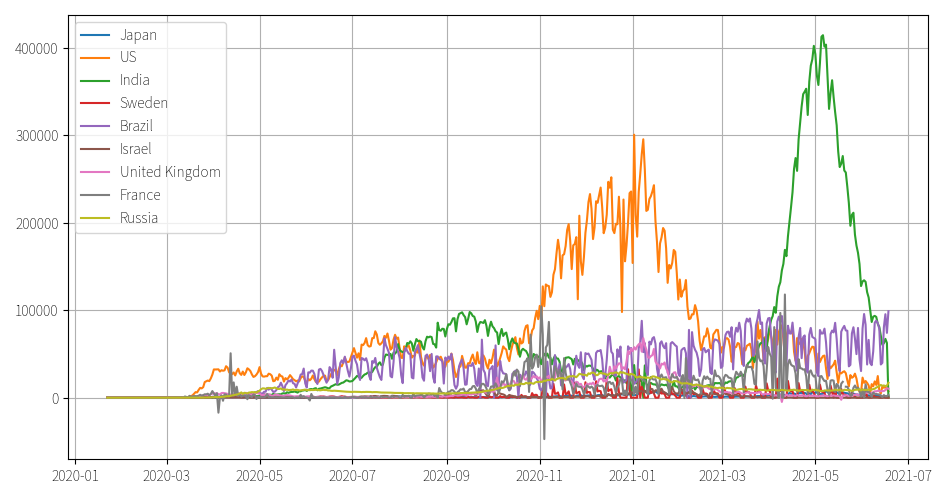

Japan
US
India
Sweden
Brazil
Israel
United Kingdom
France
Russia


In [71]:
# 主要国　新規感染者数　全期間
plt.figure(figsize=(9.5,5))
plt.grid()
dates = c_trans["date"].unique()
for c in countries["country"]:
    print(c)
    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["inc_count"],label=c, fmt="-")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


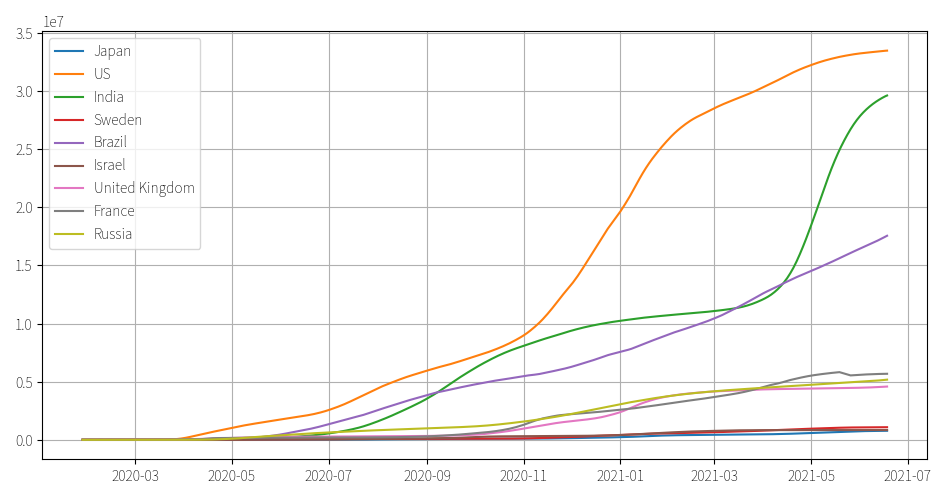

Japan
US
India
Sweden
Brazil
Israel
United Kingdom
France
Russia


In [72]:
# 主要国　新規感染者数７日間移動平均　全期間
plt.figure(figsize=(9.5,5))
plt.grid()
dates = c_trans["date"].unique()
for c in countries["country"]:
    print(c)
    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["cnt_move_ave7"],label=c, fmt="-")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


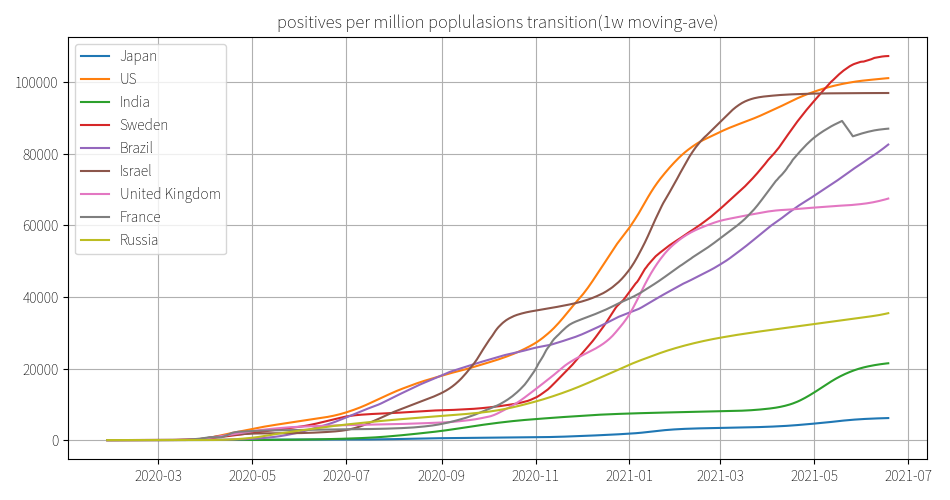

In [73]:
# 主要国　１００万人あたり感染者数累計 全期間　７日間移動平均
plt.figure(figsize=(9.5,5))
plt.grid()
plt.title("positives per million poplulasions transition(1w moving-ave)")
dates = c_trans["date"].unique()
for c in countries["country"]:
    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["cnt_move_ave7_milpop"],label=c, fmt="-")
    
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


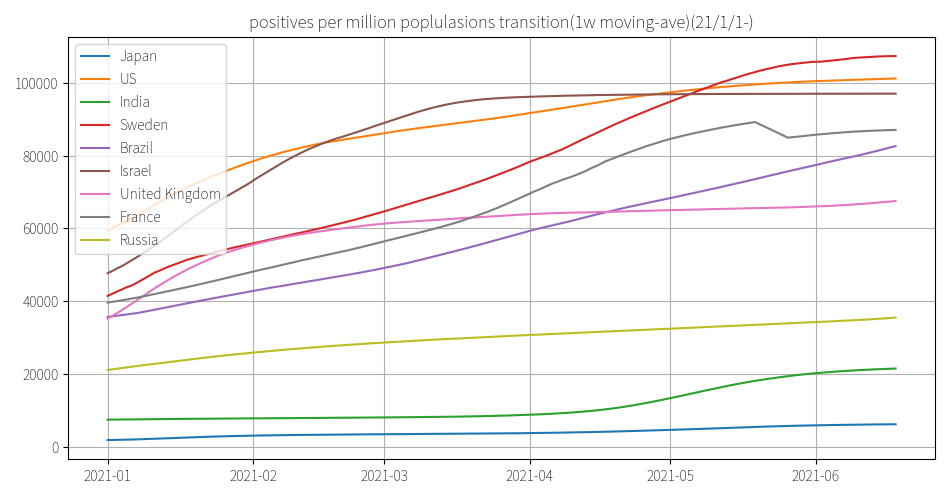

In [74]:
# 主要国　１００万人あたり感染者数累計 1月以降　７日間移動平均
plt.figure(figsize=(9.5,5))
plt.grid()
plt.title("positives per million poplulasions transition(1w moving-ave)(21/1/1-)")
dates = c_trans.loc[c_trans["date"]>="2021-01-01"]["date"].unique()
for c in countries["country"]:
    plt.plot_date(dates,c_trans.loc[(c_trans["country"]==c) & (c_trans["date"]>="2021-01-01")]["cnt_move_ave7_milpop"],label=c, fmt="-")
    
plt.legend()
plt.tight_layout()

## 人口当たりの新規感染者数

<IPython.core.display.Javascript object>


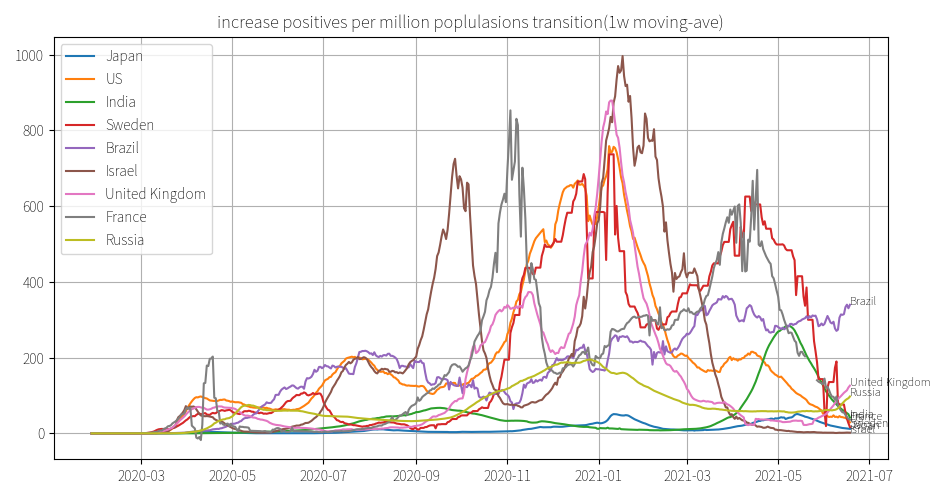

In [75]:
# 主要国　１００万人あたり新規感染者数 全期間　７日間移動平均
"""
plt.figure(figsize=(9.5,5))
plt.grid()
plt.title("increase positives per million poplulasions transition(1w moving-ave)")
dates = c_trans["date"].unique()
for c in countries["country"]:
    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["inc_move_ave7_milpop"],label=c, fmt="-")
    plt.text(dates.max(),c_trans.loc[(c_trans["country"]==c) & (c_trans["date"]==dates.max())]["inc_move_ave7_milpop"],c,fontsize=8)

plt.legend()
plt.tight_layout()
"""

## 人口100万人当たりの新規感染者数（3月以降）

<IPython.core.display.Javascript object>


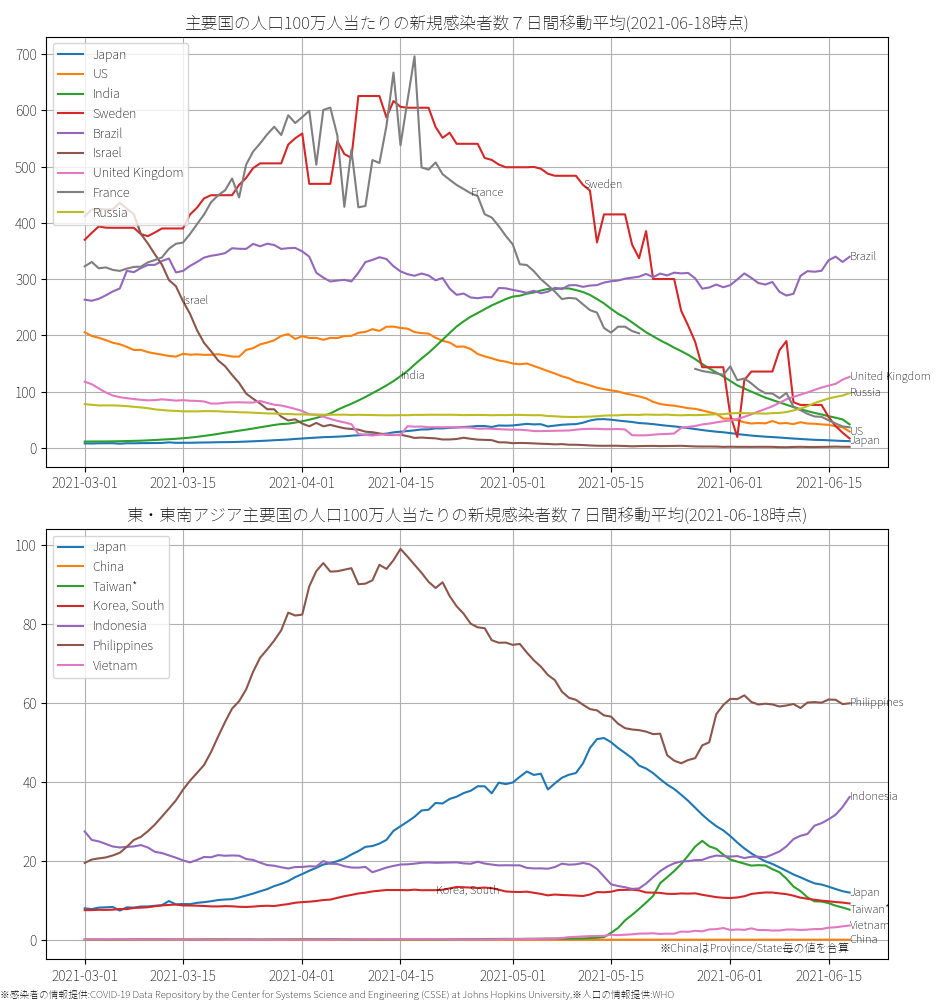

In [90]:
# 主要国　１００万人あたり感染者数累計 3月以降　７日間移動平均
fig=plt.figure(figsize=(9.5,10))
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.grid()
plt.title("主要国の人口100万人当たりの新規感染者数７日間移動平均({}時点)".format(latest_date_str))
chart_data = c_trans[c_trans.date >= "2021-03-01"]
dates = chart_data["date"].unique()
for i,cr in countries.iterrows():
    c = cr["country"]
    text_disp_date = pd.to_datetime(cr["text_disp_date"]) if cr["text_disp_date"]!="" else dates.max()
    plt.plot_date(dates,chart_data.loc[chart_data["country"]==c]["inc_move_ave7_milpop"],label=c, fmt="-")
#    plt.text(dates.max(),chart_data.loc[(chart_data["country"]==c) & (chart_data["date"]==dates.max())]["inc_move_ave7_milpop"],c
    plt.text(text_disp_date,chart_data.loc[(chart_data["country"]==c) & (chart_data["date"]==text_disp_date)]["inc_move_ave7_milpop"],c
            ,fontsize=8,va="center")
plt.legend(bbox_to_anchor=(0, 1),loc='upper left', fontsize=9)

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.grid()
plt.title("東・東南アジア主要国の人口100万人当たりの新規感染者数７日間移動平均({}時点)".format(latest_date_str))
chart_data = e_a_trans[e_a_trans.date >= "2021-03-01"]
dates = chart_data["date"].unique()
for i,cr in e_asia_c.iterrows():
    c = cr["country"]
    text_disp_date = pd.to_datetime(cr["text_disp_date"]) if cr["text_disp_date"]!="" else dates.max()
    plt.plot_date(dates,chart_data.loc[chart_data["country"]==c]["inc_move_ave7_milpop"],label=c, fmt="-")
#    plt.text(dates.max(),chart_data.loc[(chart_data["country"]==c) & (chart_data["date"]==dates.max())]["inc_move_ave7_milpop"],c
    plt.text(text_disp_date,chart_data.loc[(chart_data["country"]==c) & (chart_data["date"]==text_disp_date)]["inc_move_ave7_milpop"],c
             ,fontsize=8,va="center")
plt.legend(bbox_to_anchor=(0, 1),loc='upper left', fontsize=9)
plt.text(dates.max(),-1,"※ChinaはProvince/State毎の値を合算",ha="right",va="top",fontsize=8)

fig.text(0,0
         ,"※感染者の情報提供:COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,"\
         +"※人口の情報提供:WHO",
        fontsize=7,ha="left",va="bottom")
fig.tight_layout()


In [55]:
fig.savefig("out/covid-global-countries-transition.png")